# 🚗 Vehicle Counting on Highway using YOLOv8n

## 📌 Project Overview

This project demonstrates a computer vision-based system designed to **count the number of cars** passing through a highway using a video feed. Leveraging the lightweight and efficient **YOLOv8n** object detection model, the system identifies vehicles and tracks their movement frame-by-frame.

The primary goal was to enable **accurate vehicle detection and counting** by analyzing a traffic video. A midline was drawn across the video, and each time a car passed through it, a counter incremented. This can be particularly useful for traffic analysis, congestion monitoring, or transportation research.

---

## 🛠️ Methodology

- **Model Used**: [YOLOv8n](https://github.com/ultralytics/ultralytics) (a lightweight version of YOLOv8)
- **Object of Interest**: Only cars (`car` class from the COCO dataset)
- **Bounding Box**: A rectangle was drawn around every detected car.
- **Red Dot**: A red dot was placed at the center of each bounding box to precisely track the position.
- **Counting Line**: A static horizontal line was placed in the middle of the video frame.
- **Counting Logic**: When the red dot crossed the line, it triggered an increment in the car count.

---

## 🎞️ Input Video

The source video was taken from YouTube:  
🔗 [Highway Traffic Video](https://youtu.be/Y1jTEyb3wiI?si=Zg5NzEA2d2tskCKU)

---

## 🖼️ Example Output Frame

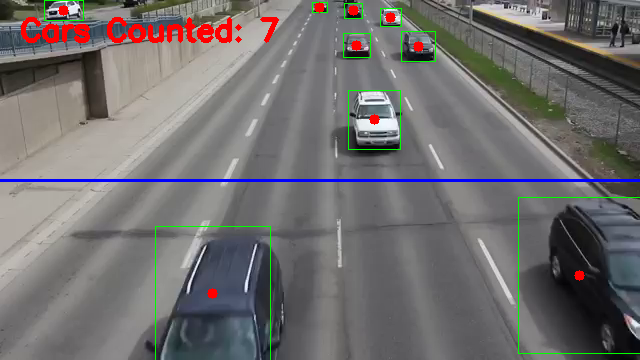

---

## 🔗 Connect with Me

- 🌐 [LinkedIn](https://www.linkedin.com/in/usman-abbasi-746a69249)
- 📊 [Kaggle](https://www.kaggle.com/usmanabbasi2002)
- 💻 [GitHub](https://github.com/UsmanAbbasi2002)

---

➡️ *Code implementation begins below.*

---

## 📌 Step 1: Install and Import Required Libraries

This step ensures that all the necessary libraries are installed and imported. The following libraries are required:

- `ultralytics` – for using YOLOv8 object detection and tracking.
- `opencv-python` – for reading and processing video frames.
- `numpy` – for mathematical operations and array manipulation.
- `os` – for handling file paths and system-level operations.

To install the libraries, run the following command:

```python
!pip install ultralytics opencv-python numpy

In [1]:
from ultralytics import YOLO
import cv2
import numpy as np
import os

## 📌 Step 2: Load the YOLOv8 Model

Here, we load the YOLOv8 Nano model (`yolov8n.pt`) using the Ultralytics library. This version of YOLOv8 is lightweight and fast, which makes it a good fit for real-time tasks like vehicle detection in video streams.

In our case, we’ll use this model to detect and track objects in a highway video. Since we’re only interested in counting **cars**, we’ll later filter out other objects


In [2]:
model = YOLO('yolov8n.pt')

CAR_CLASS_ID = 2

## 📌 Step 3: Load the Input Video and Set Up the Output Writer

In this step, we load the input video that will be used to detect and count cars. The video file should be located at:

`D:/Downloads/Highway.mp4`

If your file is saved in a different location, make sure to update the `video_path` variable in the code accordingly.

If you don’t already have the video, you can download it from this YouTube link:

🔗 https://youtu.be/Y1jTEyb3wiI?si=Zg5NzEA2d2tskCKU

Once the video is loaded, we extract some basic details:
- **FPS (frames per second)** – to keep the output smooth.
- **Width and Height** – to match the resolution of the input.

We then set up the video writer, which saves the output (with detected cars and counts) to:

`C:/Users/Administrator/Desktop/car_count_output.mp4`

Feel free to change this path if you want to save the results to a different location.

In [3]:
video_path = "D:/Downloads/Highway.mp4"
cap = cv2.VideoCapture(video_path)

fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

output_path = r"C:\Users\Administrator\Desktop\car_count_output.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

## 📌 Step 4: Initialize Car Counting Variables

We initialize `line_position` to define where the counting line will be drawn on the frame, `count` to store the total number of detected cars crossing the line, and `counted_ids` as a set to keep track of unique object IDs that have already been counted, ensuring accurate results.

In [4]:
line_position = None
count = 0
counted_ids = set()

## 📌 Step 5: Process Each Frame to Detect, Track, and Count Cars

This section iterates through each frame of the video using `model.track(...)`, which returns detection and tracking results.

The current frame is copied with `frame = result.orig_img.copy()` to allow visual annotations without modifying the original.

If the counting line has not yet been initialized, it is set to the vertical center of the frame:
```python
line_position = height // 2
```

If tracked objects are present (`result.boxes.id` is not `None`), the following are extracted:
- `boxes`: bounding box coordinates,
- `clss`: class labels,
- `ids`: unique tracking IDs.

Each detected object is processed in a loop. If the object is not a car (`cls != CAR_CLASS_ID`), it is ignored.

For valid car detections:
- The bounding box coordinates are converted to integers,
- The center point `(cx, cy)` is calculated,
- A green rectangle and a red center dot are drawn on the frame.

To count the car:
If the vertical center (`cy`) lies within ±5 pixels of the counting line **and** the object's `track_id` has not been counted previously, the count is incremented and the ID is recorded in `counted_ids`.

A horizontal blue line is drawn at the `line_position`.

The total number of counted cars is displayed on the frame using `cv2.putText(...)`.

Each annotated frame is written to the output video with `out.write(frame)` and displayed using `cv2.imshow(...)`.

The loop exits if the user presses the `'q'` key.



In [5]:
for result in model.track(source=video_path, stream=True, persist=True, show=False, tracker="bytetrack.yaml"):
    frame = result.orig_img.copy()

    if line_position is None:
        height = frame.shape[0]
        width = frame.shape[1]
        line_position = height // 2

    if result.boxes.id is not None:
        boxes = result.boxes.xyxy.cpu().numpy()
        clss = result.boxes.cls.cpu().numpy().astype(int)
        ids = result.boxes.id.cpu().numpy().astype(int)

        for box, cls, track_id in zip(boxes, clss, ids):
            if cls != CAR_CLASS_ID:
                continue  # Only track cars

            x1, y1, x2, y2 = map(int, box)
            cx = int((x1 + x2) / 2)
            cy = int((y1 + y2) / 2)

            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 1)
            cv2.circle(frame, (cx, cy), 5, (0, 0, 255), -1)

            if track_id not in counted_ids and line_position - 5 < cy < line_position + 5:
                count += 1
                counted_ids.add(track_id)

    cv2.line(frame, (0, line_position), (frame.shape[1], line_position), (255, 0, 0), 2)
    
    cv2.putText(frame, f'Cars Counted: {count}', (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)
    
    cv2.imshow("Car Counter", frame)
    
    out.write(frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


video 1/1 (frame 1/716) D:\Downloads\Highway.mp4: 384x640 2 cars, 1 truck, 137.0ms
video 1/1 (frame 2/716) D:\Downloads\Highway.mp4: 384x640 2 cars, 1 truck, 123.9ms
video 1/1 (frame 3/716) D:\Downloads\Highway.mp4: 384x640 1 car, 1 bus, 1 truck, 126.3ms
video 1/1 (frame 4/716) D:\Downloads\Highway.mp4: 384x640 2 cars, 1 truck, 105.6ms
video 1/1 (frame 5/716) D:\Downloads\Highway.mp4: 384x640 2 cars, 1 truck, 102.6ms
video 1/1 (frame 6/716) D:\Downloads\Highway.mp4: 384x640 1 person, 1 car, 2 trucks, 106.6ms
video 1/1 (frame 7/716) D:\Downloads\Highway.mp4: 384x640 1 person, 1 car, 1 truck, 108.4ms
video 1/1 (frame 8/716) D:\Downloads\Highway.mp4: 384x640 1 person, 1 car, 1 truck, 103.3ms
video 1/1 (frame 9/716) D:\Downloads\Highway.mp4: 384x640 1 person, 1 car, 1 truck, 117.2ms
video 1/1 (frame 10/716) D:\Downloads\Highway.mp4: 384x640 1 person, 1 truck, 105.2ms
video 1/1 (frame 11/716) D:\Downloads\Highway.mp4: 384x640 1 person, 1 car, 102.8ms
video 1/1 (frame 12/716) D:\Downloads\H

## 📌 Step 6: Clean Up and Exit

After processing is done:

- `cap.release()` closes the video file.  
- `out.release()` saves and closes the output video.  
- `cv2.destroyAllWindows()` closes all OpenCV windows.

This ensures everything shuts down properly.


In [6]:
cap.release()
out.release()
cv2.destroyAllWindows()